# Data Wrangling Project
### A Project to demonstarte various Data Wrangling skills

In this notebook I attempt to demonstrate various data warangling skills as learned from the Udacity classromm. This project is also submitted as a requirement to progress in the program

## Table of Contents
1. [Data Gathering](#data_gathering)
2. [Assessing the Data](#assessing_data)
3. [Cleaning the Data](#cleaning_data)
4. [Storing the Data](#storing_data)
5. [Analysis and Visualization](#analysis_and_visualization)

<a id='data_gathering'></a>
       
# 1.0 Data Gathering

In this step, data is gathered from three different sources
- From a csv file provided
- Programatically through a link provided
- From the Twitter API

In [414]:
# Importing the necessary modules for Data Gathering phase
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import testing as tm
import json
import requests
import tweepy
import re
%matplotlib inline

### Loading Data From a CSV File

In this step, I load the data from the csv file that was provided

In [415]:
# Load file from the csv file that was provided
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enhanced.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [416]:
twitter_archive_enhanced.shape

(2356, 17)

### Loading Data Programatically From a url

Here, I load the data from the url provided

In [417]:
# Use requests object to get the contents of the url and write the contents to a file

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [418]:
image_predictions.shape

(2075, 12)

### Getting Data From Twitter API

Here, I will load additional data from Twitter API

In [419]:
# Provide twitter API authentication keys. 
# Configure an authentication object
# Set access tokens

consumer_key = '####'
consumer_secret = '####'
access_token = '####'
access_token_secret = '####'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [420]:
# Get a list of all the tweet IDs in the twitter_archive file
# Check length of tweet IDs to confirm success of the operation

tweet_id_list = list(twitter_archive_enhanced['tweet_id'])
len(tweet_id_list)

2356

In [421]:
# Write each tweet's required field data to a list of dicts and save the dict in a text file
# In cases of errors, write the tweet ID and the error to a list of dictionary objects

tweet_list = []
error_list = []

for tweet_id in tweet_id_list:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        tweet_list.append({'tweet_id':tweet_id, 'text':tweet.full_text,
                          'favorite_count':tweet.favorite_count, 'retweet_count':tweet.retweet_count})
    except tweepy.TweepyException as e:
        error_list.append({'tweet_id':tweet_id, 'error':str(e)})

In [422]:
# Confirm if all the items was sucessfully processed or returned error

assert(len(tweet_id_list) == len(tweet_list) + len(error_list))

### Define some utility functions here:

In [423]:
# Define function to save a file as JSON
def write_file_to_json(file_name, file):
    '''This function save the contents of file to the specified file name'''
    with open(file_name, 'w') as f:
        f.write(json.dumps(file))
    
    
# Define function to read a JSON file
def read_json_file(file_name):
    '''This function loads the content of a JSON file in the specified file name'''
    with open (file_name) as f:
        return json.load(f)

# Define function to save a DataFrame to a CSV file
def save_dataframe_to_csv(file_name, df):
    '''This function save the content of the dataframe df to the specified file name'''
    df.to_csv(file_name, index=False)

In [424]:
# Dump the contents of the tweet_list and the error_list to a JSON file using utility methods

write_file_to_json('tweet_json.txt', tweet_list)
write_file_to_json('tweet_error_json.txt', error_list)

In [425]:
# Load contents of the tweet_json.txt and tweet_error_json to txt and write their contents into a Pandas Dataframe

data = read_json_file('tweet_json.txt')
error_data = read_json_file('tweet_error_json.txt')

In [426]:
# Create a dataframe from the tweet_json.txt file
# Read some data from the dataframe
       
twitter_data = pd.DataFrame(data)
twitter_data.head()

,tweet_id,text,favorite_count,retweet_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,33638,6961
1,892177421306343426,This is Tilly. She's just checking pup on you....,29180,5265
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,21949,3463
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,36744,7183
4,891327558926688256,This is Franklin. He would like you to stop ca...,35103,7707


In [427]:
# Create a dataframe from the tweet_error_json.txt file
# Read some data from the dataframe
       
twitter_error_data = pd.DataFrame(error_data)
twitter_error_data.head()

,tweet_id,error
0,888202515573088257,404 Not Found\n144 - No status found with that...
1,873697596434513921,404 Not Found\n144 - No status found with that...
2,872668790621863937,404 Not Found\n144 - No status found with that...
3,872261713294495745,404 Not Found\n144 - No status found with that...
4,869988702071779329,404 Not Found\n144 - No status found with that...


### Save all the File to CSV Files for Ease of Retrieval

In [428]:
# Call utility method save_dataframe_to_csv to save the twitter_data and twitter_error_data dataframes to a csv files

save_dataframe_to_csv('twitter_data.csv', twitter_data)
save_dataframe_to_csv('twitter_error_data.csv', twitter_error_data)
save_dataframe_to_csv('image_predictions_converted.csv', image_predictions)

## Data Gathering Conclusion

So far we have successfully gathered all the datasets needed for this project.
We have gathered the following  mandatory files:
1. twitter-archive-enhanced.csv
2. tweet_json.txt
3. image_predictions.tsv

We also have other additional files listed below:
1. error_tweet_json.txt - A .txt file where we save the ID and error of tweets that could not be loaded.
2. twitter_error_data.csv - A csv file containing the same data in the .txt file above
3. twitter_data.csv - a csv file containinf the same data in the .tweet_json.txt
4. image_predictions_converted.csv -  a csv file containing image predictions. This was added simply for convenience

These additional files are necessary so that we can read the contents directly and more conveniently using pandas.read_csv

<a id='assessing_data'></a>

# Assessing the Data

### Assessing the twitter_arcvhive_enhanced Dataset

In [429]:
twitter_archive_enhanced.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
873,761334018830917632,NaN,NaN,2016-08-04 22:52:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruce. I really want to hear the joke ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761334018...,10,10,Bruce,None,None,None,None
1320,706346369204748288,NaN,NaN,2016-03-06 05:11:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. She's a Beneboom Cumberwiggle. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706346369...,12,10,Koda,None,None,None,None
598,798686750113755136,NaN,NaN,2016-11-16 00:38:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Say hello to Jack (pronounced ""...",6.833919e+17,4.196984e+09,2016-01-02 20:58:09 +0000,https://twitter.com/dog_rates/status/683391852...,11,10,Jack,None,None,None,None


In [430]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

There are lots of rows containing information about retweets, we will drop those rows.

In [431]:
twitter_archive_enhanced.duplicated().sum()

0

Great, there are no duplicates in this dataset.

In [432]:
twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [433]:
twitter_archive_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [468]:
twitter_archive_enhanced.doggo.unique()

array(['None', 'doggo'], dtype=object)

In [469]:
twitter_archive_enhanced.floofer.unique()

array(['None', 'floofer'], dtype=object)

In [470]:
twitter_archive_enhanced.pupper.unique()

array(['None', 'pupper'], dtype=object)

In [471]:
twitter_archive_enhanced.puppo.unique()

array(['None', 'puppo'], dtype=object)

In [472]:
# Check the number of values in the name column with None as values
len(twitter_archive_enhanced[twitter_archive_enhanced.name == 'None'])

745

There are only 745 dogs with their name field present. All other ones were left as None.

In [473]:
# Check the number of values in the doggo column with valid dog name
len(twitter_archive_enhanced[twitter_archive_enhanced.doggo != 'None'])

97

In [474]:
# Check the number of values in the floofer column with valid values for this column
len(twitter_archive_enhanced[twitter_archive_enhanced.floofer != 'None'])

10

In [475]:
# Check the number of values in the pupper column with None as values
len(twitter_archive_enhanced[twitter_archive_enhanced.pupper != 'None'])

257

In [476]:
# Check the number of values in the puppo column with None as values
len(twitter_archive_enhanced[twitter_archive_enhanced.puppo != 'None'])

30

Columns such as name, doggo, floofer, puppo and pupper appears as not containing nulls when we infoed the twitter_archive_enhanced column, however, they contain many nulls. The nulls were actually represented as None. This is a value returned by a regular expression if it doesn't match a specifed pattern in a string.

### Assessing the image_predictions Dataset

In [477]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [478]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [479]:
image_predictions.tweet_id.is_unique

True

In [480]:
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

Image predictions containing 4 was not given as part of the dataset. We need to drop those rows containing 4

In [481]:
print(f'Unique images in p1: {image_predictions.p1.nunique()}')
print(f'Unique images in p1: {image_predictions.p2.nunique()}')
print(f'Unique images in p1: {image_predictions.p3.nunique()}')

Unique images in p1: 378
Unique images in p1: 405
Unique images in p1: 408


Each image column above has lots of wrong predictions.

In [482]:
# Check to see if we have values other than True and False
image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [483]:
# Check to see if we have values other than True and False
image_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [484]:
# Check to see if we have values other than True and False
image_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [485]:
# Check to see if there are no values greater than 1 or less than 0

print(f'{image_predictions.p1_conf.min()}, {image_predictions.p1_conf.max()}')
print(f'{image_predictions.p2_conf.min()}, {image_predictions.p2_conf.max()}')
print(f'{image_predictions.p3_conf.min()}, {image_predictions.p3_conf.max()}')

0.0443334, 1.0
1.0113000000000001e-08, 0.488014
1.7401699999999998e-10, 0.273419


All great, no negative values or values greater than 1.

In [486]:
# Get 10 samples of the image predictions corresponding to dog breed or not dog breed
image_predictions[['p1_dog', 'p2_dog', 'p3_dog']].sample(10)

,p1_dog,p2_dog,p3_dog
1011,True,True,True
186,True,True,True
19,True,True,True
1934,True,True,True
1222,True,True,False
1431,False,True,True
445,True,True,True
1511,True,True,True
1645,True,True,True
1725,False,False,False


In [487]:
image_predictions.iloc[325,:]

tweet_id                                 671882082306625538
jpg_url     https://pbs.twimg.com/media/CVMBL_LWUAAsvrL.jpg
img_num                                                   1
p1                                                 ski_mask
p1_conf                                            0.968325
p1_dog                                                False
p2                                                     mask
p2_conf                                            0.021863
p2_dog                                                False
p3                                                    abaya
p3_conf                                            0.005479
p3_dog                                                False
Name: 325, dtype: object

In [488]:
# check to confirm all non-dog enteries for this row
image_predictions[image_predictions.tweet_id == 715360349751484417]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1064,715360349751484417,https://pbs.twimg.com/media/Ce14cOvWwAAcFJH.jpg,1,nail,0.855552,False,screw,0.073277,False,padlock,0.02397,False


Quite a number of rows have enteries that does not relate at all with dogs. We have to remove those.

In [489]:
# Run few samples of the dataframe to find possible errors. We'll run this cell five times, just to spot possible problems
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
118,668154635664932864,https://pbs.twimg.com/media/CUXDGR2WcAAUQKz.jpg,1,Arctic_fox,0.473584,False,wallaby,0.261411,False,white_wolf,0.080948,False
485,675489971617296384,https://pbs.twimg.com/media/CV_SimUWoAAvJSY.jpg,1,West_Highland_white_terrier,0.139613,True,seat_belt,0.118647,False,Old_English_sheepdog,0.093952,True
1310,754120377874386944,https://pbs.twimg.com/media/CncseIzWgAA4ghH.jpg,1,chow,0.168909,True,Norfolk_terrier,0.129114,True,Pomeranian,0.120822,True
2024,881666595344535552,https://pbs.twimg.com/media/DDxPFwbWAAEbVVR.jpg,1,Saluki,0.529012,True,Afghan_hound,0.250003,True,golden_retriever,0.160739,True
919,701889187134500865,https://pbs.twimg.com/media/Cb2cfd9WAAEL-zk.jpg,1,French_bulldog,0.902856,True,Staffordshire_bullterrier,0.022634,True,soap_dispenser,0.011973,False
48,666826780179869698,https://pbs.twimg.com/media/CUELa0NUkAAscGC.jpg,1,Maltese_dog,0.359383,True,teddy,0.148759,False,West_Highland_white_terrier,0.106007,True
1917,854732716440526848,https://pbs.twimg.com/media/C9ye3b3WAAAlTo0.jpg,1,Pembroke,0.695548,True,Cardigan,0.058902,True,chow,0.028411,True
1884,847606175596138505,https://pbs.twimg.com/media/C8NNUDBUMAE0XxJ.jpg,1,Cardigan,0.413688,True,Boston_bull,0.381836,True,doormat,0.065868,False
1851,840370681858686976,https://pbs.twimg.com/media/C6mYrK0UwAANhep.jpg,1,teapot,0.981819,False,cup,0.014026,False,coffeepot,0.002421,False
684,683852578183077888,https://pbs.twimg.com/media/CX2ISqSWYAAEtCF.jpg,1,toy_poodle,0.551352,True,teddy,0.180678,False,miniature_poodle,0.164095,True


Running .sample on the dataframe reveals the following issues:
    
- Some rows appear to contain the same info e.g. rows with index 1494 and 1636 appears to contain the same info.
- Some rows have incorrect prediction scores in the img_num column e.g. row with index 1018 has 2 in the img_num column, however, p1_conf is the highest in that row, p1_dog is True - meaning it's a dog, and p1 (toy_poodle) is actually a dog breed

We will need to define a function to map the correct predictions to the correct img_num

### Let's investigate incorrect predictions first

In [490]:
image_predictions.iloc[1018,:]

tweet_id                                 710117014656950272
jpg_url     https://pbs.twimg.com/media/CdrXp9dWoAAcRfn.jpg
img_num                                                   2
p1                                               toy_poodle
p1_conf                                            0.802092
p1_dog                                                 True
p2                                         miniature_poodle
p2_conf                                            0.111647
p2_dog                                                 True
p3                                           cocker_spaniel
p3_conf                                            0.062866
p3_dog                                                 True
Name: 1018, dtype: object

In [491]:
# Check the prediction for this row
image_predictions[image_predictions.tweet_id == 688385280030670848]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
755,688385280030670848,https://pbs.twimg.com/media/CY2iwGNWUAI5zWi.jpg,2,golden_retriever,0.900437,True,cocker_spaniel,0.022292,True,sombrero,0.014997,False


As we can see, p1 is Golden Retriever and is the first image. p1_conf is above 90% and p1_dog is true. Let us quickly check the twitter_archive_enhanced dataset to get this particular tweet, then check the expanded to get the actual tweet and see if this tweet is actually a Golden Retriever or not.

In [492]:
# Get that particular tweet from the twitter_archive_enhanced dataset
twitter_archive_enhanced[twitter_archive_enhanced.tweet_id == 688385280030670848]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1561,688385280030670848,NaN,NaN,2016-01-16 15:40:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He's takes top-notch selfies. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688385280...,12,10,Louis,None,None,None,None


In [493]:
# Retrieve the tweet url
twitter_archive_enhanced.loc[1561, 'expanded_urls'].split(',')[:-1][0]

'https://twitter.com/dog_rates/status/688385280030670848/photo/1'

<img src='images/louis.png' alt='Golden Retriever incorrectly classified' />

As we can see, some predictions are not correct. For example, the entry with tweet_id: 688385280030670848 shown below has 2 in the img_num column indicating that the second image has the highest confidence level and is a cocker_spaniel. This is not correct. It is clear that the first image, having p1_conf value of about 90% has the highest confidence. I retrieved the expanded_url for that particular tweet from the twitter_archive_enhanced dataset. When I searched for that particular tweet, it was indeed a Golden_retriever. [Click this link to see](https://twitter.com/dog_rates/status/688385280030670848/photo/1)

I select only columns with the highest confidence and if the image is a dog

### Next, let's investigate some rows that appears to contain duplicate enteries

We saw above that some rows appear to contain duplicates such as 1494 and 1636, yet the dataframe could not return true when we ran the duplicated method on the dataframe.

In [494]:
image_predictions.duplicated().sum()

0

There seems to be no duplicates in this dataset

In [495]:
image_predictions.iloc[1494,:]

tweet_id                                 783334639985389568
jpg_url     https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg
img_num                                                   2
p1                                                 Cardigan
p1_conf                                            0.593858
p1_dog                                                 True
p2                                        Shetland_sheepdog
p2_conf                                            0.130611
p2_dog                                                 True
p3                                                 Pembroke
p3_conf                                            0.100842
p3_dog                                                 True
Name: 1494, dtype: object

In [496]:
image_predictions.iloc[1636,:]

tweet_id                                 806242860592926720
jpg_url     https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg
img_num                                                   2
p1                                                 Cardigan
p1_conf                                            0.593858
p1_dog                                                 True
p2                                        Shetland_sheepdog
p2_conf                                            0.130611
p2_dog                                                 True
p3                                                 Pembroke
p3_conf                                            0.100842
p3_dog                                                 True
Name: 1636, dtype: object

In [497]:
# Let's check to see if these are actually equal

a = image_predictions.iloc[1494,:]
b = image_predictions.iloc[1636,:]
tm.assert_series_equal(a, b)

AssertionError: Series are different

Series values are different (8.33333 %)
[index]: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
[left]:  [783334639985389568, https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg, 2, Cardigan, 0.593858, True, Shetland_sheepdog, 0.1306109999999999, True, Pembroke, 0.100842, True]
[right]: [806242860592926720, https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg, 2, Cardigan, 0.593858, True, Shetland_sheepdog, 0.1306109999999999, True, Pembroke, 0.100842, True]

We get an assertion error from above, however, on inspection, we see that with the exception of the tweet_id, every other single information is exactly the same. The same tweet, having the exact same content must have been sent twice.

Let us confirm if all other information in the rows are exactly the same with the exception of the tweet_id. This will expose actual duplicates from the dataset so that we can drop them.

In [498]:
# Get the names of all the columns in image_predictions with the exception of the tweed_id
# Check to see if tweets are actually duplicated.
req_columns = list(image_predictions.columns[1:])
image_predictions[req_columns].duplicated().sum()

66

There we have it. There are 66 tweets duplicated in this dataset. These are the same tweets sent multiple times, hence, they differed only in the tweet_id since every tweet has it's own unique id. We need to drop those duplicated tweets.

### Assessing the twitter_data Dataset (Dataset gathered from Twitter)

In [499]:
twitter_data.head(10)

,tweet_id,text,favorite_count,retweet_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,33638,6961
1,892177421306343426,This is Tilly. She's just checking pup on you....,29180,5265
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,21949,3463
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,36744,7183
4,891327558926688256,This is Franklin. He would like you to stop ca...,35103,7707
5,891087950875897856,Here we have a majestic great white breaching ...,17724,2583
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,10319,1644
7,890729181411237888,When you watch your owner call another dog a g...,56544,15664
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,24386,3599
9,890240255349198849,This is Cassie. She is a college pup. Studying...,27800,6059


In [500]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2326 non-null   int64 
 1   text            2326 non-null   object
 2   favorite_count  2326 non-null   int64 
 3   retweet_count   2326 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


Since we are not interested in retweets, we need to drop the retweet_count column from the dataset

In [501]:
twitter_data.tweet_id.nunique()

2326

In [502]:
twitter_data.duplicated().sum()

0

All the tweets are unique. However, like we saw above, they might only be unique due to differences in their tweet_id. We want to check this situation also.

In [503]:
# Get the names of all the columns in twitter_data dataframe with the exception of the tweed_id
# Check to see if tweets are actually duplicated.

req_columns = list(twitter_data.columns[1:])
twitter_data[req_columns].duplicated().sum()

0

Great. There are no duplicated values in this dataset.

However, before we wrap this session up, let us also run the same check for the twitter_archive_enhanced dataframe above to be very sure it doesn't contain actual duplicates when we exclude tweet_ids.

In [504]:
twitter_archive_enhanced.duplicated().sum()

0

In [505]:
# Get the names of all the columns in twitter_data dataframe with the exception of the tweed_id
# Check to see if tweets are actually duplicated.

req_columns = list(twitter_archive_enhanced.columns[1:])
twitter_archive_enhanced[req_columns].duplicated().sum()

0

Very cool. No dulicates here also. 

After assessing the three datasets, the following quality and tidyness issues were noted:

## Quality issues

### twitter_archive_enhanced dataset
1. Dataset contains information on retweets. We do not want retweets. We drop rows and columns containing retweets.
   - Although we have nulls in the dataset, they are found in the retweet columns that we are going to drop anyways.
2. The timestamp column have the wrong datatype.
3. Redundant columns in the dataset. The necessary info in the source column has been extracted, making those columns redundant in this analysis.
4. Rating denominator is always 10 in dog ratings, other values may have been wrongly entered.
5. Outliers in the rating_numerator

### image_predictions dataset
6. image_prediction dataframe does not contain p4, p4_conf nor p4_dog
7. Drop rows where the image is not a dog breed.
8. Get the correct img_num and dog breed. 
9. Drop columns from image_predictions where predictions was not correct 
10. Drop duplicated tweets in the dataset.


### twitter_data dataset twitter_data
11. We only want tweets and not retweets, drop the retweet_count column

## Tidyness issues

### twitter_archive_enhanced dataset
1. One variable in four columns - doggo, floofer, pupper and puppo and dog stages
2. We should have just one table not three.

### Assessing the Data Conclusion

We have identified quite a few quality and tidyness issue. I will proceed now to clean those up. Additional issues will be documented if necessary.

<a id="cleaning_data"></a>

# Cleaning the Data

In [506]:
# Let's first create copies of the original dataframes
twitter_archive_clean = twitter_archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
twitter_data_clean = twitter_data.copy()

## Dealing With Issues Relating to Quality in the Datasets

### Issue #1: Dataset contains information on retweets

In [507]:
 twitter_archive_clean.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### Define

The twitter_archive dataset contains some rows and columns that houses information on retweets. We do not want informaation on retweets, hence, we go ahead to drop those rows and columns.

In [508]:
print(twitter_archive_clean['retweeted_status_id'].isna().sum())

2175


### Code

In [509]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isna()]

### Test

In [510]:
twitter_archive_clean['retweeted_status_id'].notnull().sum()

0

In [511]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [512]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['in_reply_to_user_id'].isna()]

In [513]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

Notice that expanded_urls column now contains nulls as a result of the operation above. Let's quickly take care of that also

### Define: Emerging nulls

Remove null rows after above action is carried out

### Code 

In [514]:
twitter_archive_clean.dropna(subset=['expanded_urls'], inplace=True)

### Test

In [515]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2094 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2094 non-null   object 
 4   source                      2094 non-null   object 
 5   text                        2094 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2094 non-null   int64  
 11  rating_denominator          2094 non-null   int64  
 12  name                        2094 non-null   object 
 13  doggo                       2094 

In [516]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Define: Drop columns that contains retweet information

### Code:

In [517]:
# Extract the required columns into a list. Create a new dataframe from that list of columns
# Save the new dataframe in twitter_archive_clean.

req_col = ['tweet_id', 'timestamp', 'source', 'expanded_urls', 'text', 'rating_numerator','rating_denominator', 'name', 'doggo', 'floofer','pupper', 'puppo']
twitter_archive_clean = twitter_archive_clean[req_col]

### Test

In [518]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,expanded_urls,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


In [519]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'expanded_urls', 'text',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [520]:
len(twitter_archive_clean)

2094

### Issue #2: Convert timestamp column's dtype to pandas datetime 

In [521]:
twitter_archive_clean.dtypes

tweet_id               int64
timestamp             object
source                object
expanded_urls         object
text                  object
rating_numerator       int64
rating_denominator     int64
name                  object
doggo                 object
floofer               object
pupper                object
puppo                 object
dtype: object

### Define: 

The timestamp column in the twitter_archive_clean has object datatype instead of the more appropriate datatime object. I call pandas to_datatime method to convert the values to the right values.

### Code:

In [522]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'], errors='ignore')

### Test:

In [523]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   expanded_urls       2094 non-null   object             
 4   text                2094 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   name                2094 non-null   object             
 8   doggo               2094 non-null   object             
 9   floofer             2094 non-null   object             
 10  pupper              2094 non-null   object             
 11  puppo               2094 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issue #3: Redundant column in the dataset

In [524]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'expanded_urls', 'text',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Define: 

The source column appears to be redundant in this analysis. We apparently do not have need for it, hence, we drop it

### Code:

In [525]:
twitter_archive_clean.drop('source', axis=1, inplace=True)

### Test:

In [526]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   expanded_urls       2094 non-null   object             
 3   text                2094 non-null   object             
 4   rating_numerator    2094 non-null   int64              
 5   rating_denominator  2094 non-null   int64              
 6   name                2094 non-null   object             
 7   doggo               2094 non-null   object             
 8   floofer             2094 non-null   object             
 9   pupper              2094 non-null   object             
 10  puppo               2094 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 196.3+ KB


### Issue #4: Rating denominator is always 10 in dog ratings

In [527]:
twitter_archive_clean.rating_denominator.unique()

array([ 10,  70,   7, 150,  11, 170,  20,  50,  90,  80,  40, 110, 120,
         2], dtype=int64)

### Define:

Although the numerator in the dog rating_numerator could be greater than 10, denominators are always to be 10. Values greater than 10 may be due to errors when retrieving the scores from the text associated with each tweet.

### Code:

In [528]:
twitter_archive_clean['rating_denominator'] = 10

### Test:

In [529]:
twitter_archive_clean['rating_denominator'].unique()

array([10], dtype=int64)

### Issue #5: Outliers in the rating_denominator

In [530]:
twitter_archive_clean['rating_numerator'].unique()

array([  13,   12,   14,    5,   11,    6,   10,    0,   84,   24,   75,
         27,    3,    7,    8,    9,    4,  165, 1776,  204,   50,   99,
         80,   45,   60,   44,  121,   26,    2,  144,   88,    1,  420],
      dtype=int64)

### Define:

Although the ratings in the rating_numerator column of the twitter_archive_clean dataset can be greater than the denominator, we can observe some ridiculous values in that column. This could be intentional from the person that posted the tweet, most likely, it is an error that occured while extracting the numerator values from the tweet text.

A peek into the unique values in the column shows that realistic values are in the range 1 to 15. Browsing through the WeRateDogs twitter handle reveals that dog ratings for the numerator are obviously not greater than 15. 

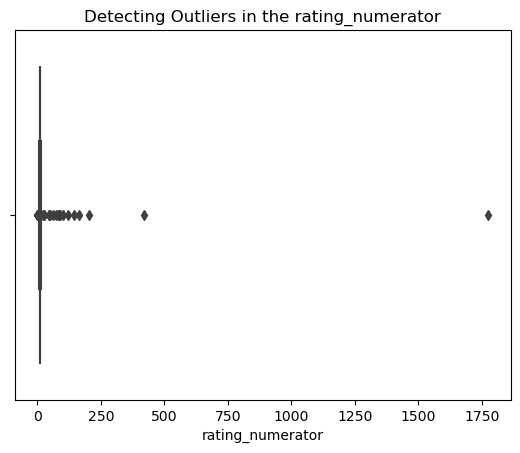

In [531]:
sns.boxplot(x=twitter_archive_clean['rating_numerator']);
plt.title('Detecting Outliers in the rating_numerator');

### Code:

Define a function that replaces outliers with the median value in the series, since mean itself is affected by outliers.

In [532]:
# Replace outliers with median values

Q1 = twitter_archive_clean.rating_numerator.quantile(0.25)
Q3 = twitter_archive_clean.rating_numerator.quantile(0.95)
median = twitter_archive_clean.rating_numerator.quantile(0.50)

def remove_outliers(value):
    if value < Q1 or value > Q3:
        return median
    else:
        return value
    
twitter_archive_clean['rating_numerator'] = twitter_archive_clean.rating_numerator.apply(remove_outliers)

### Test:

In [533]:
twitter_archive_clean['rating_numerator'].unique()

array([13., 12., 11., 10.])

In [534]:
twitter_archive_clean['rating_numerator'].value_counts()

11.0    888
12.0    485
10.0    434
13.0    287
Name: rating_numerator, dtype: int64

### Issue #6: image_prediction dataframe does not contain p4, p4_conf nor p4_dog

In [535]:
image_predictions_clean['img_num'].unique()

array([1, 4, 2, 3], dtype=int64)

### Define:

The unique values in the img_num column are (1,2,3,4), however, we have confidence levels, image and whether image is a dog or not provided for just the first three. We need to drop rows that have 4 in the img_num column.

### Code:

In [536]:
to_drop = image_predictions_clean[image_predictions_clean.img_num == 4].index
image_predictions_clean.drop(to_drop, inplace=True)

### Test:

In [537]:
image_predictions_clean.img_num.value_counts()

1    1780
2     198
3      66
Name: img_num, dtype: int64

### Issue #7: Drop rows where the image is not a dog breed.

In [538]:
image_predictions[image_predictions.tweet_id == 715360349751484417]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1064,715360349751484417,https://pbs.twimg.com/media/Ce14cOvWwAAcFJH.jpg,1,nail,0.855552,False,screw,0.073277,False,padlock,0.02397,False


### Define:

Some rows have all Falses in p1_dog, p2_dog and p3_dog columns. This means none of these images are actual dog images. I drop them.

In [539]:
mask = image_predictions_clean[['p1_dog','p2_dog','p3_dog']].any(1)

In [540]:
# Now drop the rows where the predictions are anything but dog
image_predictions_clean = image_predictions_clean[mask]

### Test:

In [541]:
image_predictions_clean[image_predictions_clean.tweet_id == 715360349751484417]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #8: Get the correct img_num and dog breed.

In [542]:
image_predictions[image_predictions.tweet_id == 688385280030670848]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
755,688385280030670848,https://pbs.twimg.com/media/CY2iwGNWUAI5zWi.jpg,2,golden_retriever,0.900437,True,cocker_spaniel,0.022292,True,sombrero,0.014997,False


### Define:

We have dropped rows where all predictions are false. With this action, we are sure that we have all the rows contains enteries for a dog at least. Next, we will define a function that will map the correct img_num to the correct image that holds the highest confidence level.

### Select only relevant columns from the image_predictions_clean dataset
The important columns that we need from this dataset are tweet_id, jpg_url, the dog breed and perhaps the associated confidence level. To do this, I will iterate through the rows of the dataframe and perform the following checks:

- select the highest of the three prediction confidence result and check if the associated image is a dog, otherwise, check the second highest result and see if it's a dog, else, move to the third.
- Attache the selected dog breed to a list which we'll merge to the dataframe later

### Code: 

In [543]:
# The function below has a bunch of if-elif-else statements. The goal is to get the image with the highest confidence
# then check if it's a dog breed. If it's not, check the second highest confidence and also see if that is also a 
# dog breed. again, if it's not, move to the third.

def get_breed(df):
    """
    input: df - Dataframe object
    This function receives a dataframe and returns a dictionary whose keys are tweet_ids, img_id, which corresponds to the
    actual dog image with the highest predicted confidence, dog_breed, and the associated confidence
    returns: a dictionary object
    """
    res_list = []
    for _, row in df.iterrows():
        tweet_id = row['tweet_id']
        p1, p2, p3 = row['p1'], row['p2'], row['p3']
        p1_conf, p2_conf, p3_conf = row['p1_conf'], row['p2_conf'], row['p3_conf']
        p1_dog, p2_dog, p3_dog = row['p1_dog'], row['p2_dog'], row['p3_dog']
        
        # Perform checks to ensure first image is dog and has the corresponding confidence
        if p1_conf > max(p2_conf, p3_conf) and p1_dog:
            res_list.append({'tweet_id':tweet_id, 'img_id':1, 'dog_breed':p1,'confidence':p1_conf})    
        elif p2_conf > max(p1_conf, p3_conf) and p2_dog:
            res_list.append({'tweet_id':tweet_id, 'img_id':2, 'dog_breed':p2,'confidence':p2_conf}) 
        elif p3_conf > max(p2_conf, p1_conf) and p3_dog:
            res_list.append({'tweet_id':tweet_id, 'img_id':3, 'dog_breed':p3,'confidence':p3_conf})
            
            
        elif ((p3_conf < p1_conf < p2_conf) and ~p2_dog) and p1_dog:
            res_list.append({'tweet_id':tweet_id, 'img_id':1, 'dog_breed':p1,'confidence':p1_conf})
        elif ((p3_conf < p2_conf < p1_conf) and ~p1_dog) and p2_dog:
            res_list.append({'tweet_id':tweet_id, 'img_id':2, 'dog_breed':p2,'confidence':p2_conf})
        elif ((p1_conf < p3_conf < p2_conf) and ~p2_dog) and p3_dog:
            res_list.append({'tweet_id':tweet_id, 'img_id':3, 'dog_breed':p3,'confidence':p3_conf})
        elif ((p2_conf < p1_conf < p3_conf) and ~p3_dog) and p1_dog:
            res_list.append({'tweet_id':tweet_id, 'img_id':1, 'dog_breed':p1,'confidence':p1_conf})    
        elif ((p1_conf < p2_conf < p3_conf) and ~p3_dog) and p2_dog:
            res_list.append({'tweet_id':tweet_id, 'img_id':2, 'dog_breed':p2,'confidence':p2_conf})    
        elif ((p2_conf < p3_conf < p1_conf) and ~p1_dog) and p3_dog:
            res_list.append({'tweet_id':tweet_id, 'img_id':3, 'dog_breed':p3,'confidence':p3_conf})
       
        
        elif (p2_conf > p1_conf < p3_conf) and ~(p1_dog or p3_dog) and p1_dog:
            res_list.append({'tweet_id':tweet_id, 'img_id':1, 'dog_breed':p1,'confidence':p1_conf})
        elif (p1_conf > p2_conf < p3_conf) and ~(p1_dog or p2_dog) and p2_dog:
            res_list.append({'tweet_id':tweet_id, 'img_id':2, 'dog_breed':p2,'confidence':p2_conf})

        elif (p1_conf > p3_conf < p2_conf) and ~(p1_dog or p2_dog) and p3_dog:
            res_list.append({'tweet_id':tweet_id, 'img_id':3, 'dog_breed':p3,'confidence':p3_conf})
        else:
           res_list.append({'tweet_id':tweet_id, 'img_id':4, 'dog_breed':'not found','confidence':0.0}) 
    return res_list

In [544]:
# Call the function to get the real predictions
res_dict = get_breed(image_predictions_clean)

In [545]:
# Convert dict object to dataframe
new_df = pd.DataFrame(res_dict)

In [546]:
new_df.head()

,tweet_id,img_id,dog_breed,confidence
0,666020888022790149,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,1,redbone,0.506826
2,666033412701032449,1,German_shepherd,0.596461
3,666044226329800704,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,1,miniature_pinscher,0.560311


### Test:

In [547]:
# Confirm that the dataframe now contains the correct predictions
new_df[new_df.tweet_id == 688385280030670848]

,tweet_id,img_id,dog_breed,confidence
590,688385280030670848,1,golden_retriever,0.900437


So we have it! golden_retriever, confidence above 90% and img_id is 1

### Issue #9: Drop unnecesary columns from image_predictions_clean

### Define: 
Use the new Dataframe in place of image_predictions_clean

### Code:

In [548]:
image_predictions_clean = new_df

### Test:

In [549]:
image_predictions_clean.head()

,tweet_id,img_id,dog_breed,confidence
0,666020888022790149,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,1,redbone,0.506826
2,666033412701032449,1,German_shepherd,0.596461
3,666044226329800704,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,1,miniature_pinscher,0.560311


### Issue #10: Drop Duplicated tweets in dataset

In [550]:
image_predictions_clean.duplicated().sum()

0

In [551]:
image_predictions_clean[image_predictions_clean.columns[1:]].duplicated().sum()

60

In [552]:
len(image_predictions_clean)

1724

### Define:

image_prediction_clean appears not to have duplicates but it actually has. These are exact same tweets that were sent multiple times. Since they were sent more than once, they have different tweet_ids but the contents are actually the same. When we excluded the tweet_id column, you will discover that they were duplicates as shown above.

### Code

In [553]:
image_predictions_clean = image_predictions_clean[~(image_predictions_clean[image_predictions_clean.columns[1:]].duplicated())]

### Test:

In [554]:
len(image_predictions_clean)

1664

In [555]:
image_predictions_clean[image_predictions_clean.columns[1:]].duplicated().sum()

0

In [557]:
assert(1664 + 60 == 1724)

## Quality issues

### twitter_archive_enhanced dataset
1. Dataset contains information on retweets. We do not want retweets. We drop rows and columns containing retweets.
   - Although we have nulls in the dataset, they are found in the retweet columns that we are going to drop anyways.
2. The timestamp column have the wrong datatype.
3. Redundant columns in the dataset. The necessary info in the source column has been extracted, making those columns redundant in this analysis.
4. Rating denominator is always 10 in dog ratings, other values may have been wrongly entered.
5. Outliers in the rating_numerator

### image_predictions dataset
6. image_prediction dataframe does not contain p4, p4_conf nor p4_dog
7. Drop rows where the image is not a dog breed.
8. Get the correct img_num and dog breed. 
9. Drop columns from image_predictions where predictions was not correct 
10. Drop duplicated tweets in the dataset.


### twitter_data dataset twitter_data
11. We only want tweets and not retweets, drop the retweet_count column

## Tidyness issues

### twitter_archive_enhanced dataset
1. One variable in four columns - doggo, floofer, pupper and puppo and dog stages
2. We should have just one table not three.

### Issue #11: Drop retweets column

### Define

We want actual tweets not retweets, hence we drop the retweets column. We will ensure that the final dataset is void of any retweet information when we finally merge it to the tweet_archive_clean dataframe usning the tweet id column as the join column

In [558]:
twitter_data_clean.head()

,tweet_id,text,favorite_count,retweet_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,33638,6961
1,892177421306343426,This is Tilly. She's just checking pup on you....,29180,5265
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,21949,3463
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,36744,7183
4,891327558926688256,This is Franklin. He would like you to stop ca...,35103,7707


### Code:`

In [561]:
twitter_data_clean.drop('retweet_count', axis=1, inplace=True)

### Test

In [562]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2326 non-null   int64 
 1   text            2326 non-null   object
 2   favorite_count  2326 non-null   int64 
 3   retweet_count   2326 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


## Addressing Issues Relating to Tidyness

### Issue #1: One Variable in four columns

In [563]:
twitter_archive_clean.head(2)

,tweet_id,timestamp,expanded_urls,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,https://twitter.com/dog_rates/status/892420643...,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,https://twitter.com/dog_rates/status/892177421...,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,None,None,None,None


### Define:

The variables doggo, floofer, puppo and pupper all refer to the various dog stage. According to the specification of Tidy Data, these are supposed to be rows not columns.

We will melt the doggo, floofer, pupper and puppo columns into one column named dog_stage

In [564]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'expanded_urls', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Code:

In [565]:
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=
                                ['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
                               'rating_denominator', 'name'], var_name='dog_stage', value_name='dog_stage_name')
twitter_archive_clean = twitter_archive_clean.drop_duplicates(subset=['tweet_id', 'name'], keep='first')

### Test

In [566]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   text                2094 non-null   object             
 3   expanded_urls       2094 non-null   object             
 4   rating_numerator    2094 non-null   float64            
 5   rating_denominator  2094 non-null   int64              
 6   name                2094 non-null   object             
 7   dog_stage           2094 non-null   object             
 8   dog_stage_name      2094 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(5)
memory usage: 163.6+ KB


### Issue #2: All three datasets should be in a single table

### Define:

All three datasets logically represent the same information about dogs, they should all be in one single dataframe not multiple.

### Code

In [567]:
# Forgot to add clean to the copied twitter_data above, do so now since there were no cleaning carried out on it.

twitter_data_clean = twitter_data.copy()
twitter_archive_master = pd.merge(twitter_archive_clean, pd.merge(image_predictions_clean, twitter_data_clean))

### Test

In [568]:
twitter_archive_master.shape

(1630, 14)

In [569]:
twitter_archive_master.duplicated().sum()

0

In [570]:
twitter_archive_master.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,dog_stage_name,img_id,dog_breed,confidence,favorite_count,retweet_count
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,doggo,None,1,Chihuahua,0.323581,29180,5265
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,doggo,None,1,Chihuahua,0.716012,21949,3463
2,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,doggo,None,2,Labrador_retriever,0.168086,36744,7183
3,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,doggo,None,1,basset,0.555712,35103,7707
4,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,doggo,None,1,Chesapeake_Bay_retriever,0.425595,17724,2583


<a id="storing_data"></a>

# Saving the Master Dataset

In [571]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

<a id="analysis_and_visualization"></a>

# Analysis and Visualization

In [572]:
pd.set_option("display.max_rows", None)
twitter_archive_master['dog_breed'].value_counts()

golden_retriever                  153
Labrador_retriever                102
Pembroke                           91
Chihuahua                          87
pug                                61
toy_poodle                         47
chow                               47
Pomeranian                         40
Samoyed                            40
malamute                           32
cocker_spaniel                     30
French_bulldog                     30
Chesapeake_Bay_retriever           30
miniature_pinscher                 23
Eskimo_dog                         22
German_shepherd                    21
Cardigan                           21
Siberian_husky                     20
Shih-Tzu                           20
beagle                             20
Staffordshire_bullterrier          19
Maltese_dog                        19
Rottweiler                         18
Shetland_sheepdog                  18
basset                             17
Italian_greyhound                  17
Lakeland_ter

In [573]:
len(twitter_archive_master.dog_breed.value_counts())

113

Waoh, that's a handfull. We have 113 breeds of dogs. Let's work with a subset of that. We take dog breeds that have 49 above. That leaves us with 7 dog breeds.

Next, we will create a new dataframe containing only dog breeds in this category

In [574]:
breeds = list(twitter_archive_master['dog_breed'].value_counts().index[:7])
breeds

['golden_retriever',
 'Labrador_retriever',
 'Pembroke',
 'Chihuahua',
 'pug',
 'toy_poodle',
 'chow']

In [575]:
# Get only rows from master_dataset where the dog_breed is in the top 7
twitter_archive_master = twitter_archive_master.loc[twitter_archive_master['dog_breed'].isin(breeds)]

In [576]:
twitter_archive_master.dog_breed.value_counts()

golden_retriever      153
Labrador_retriever    102
Pembroke               91
Chihuahua              87
pug                    61
chow                   47
toy_poodle             47
Name: dog_breed, dtype: int64

# Visualizations

## Distribution of Dog Rating Score for The Dog Breeds

We plot a histogram to show the distribution of the ratings (rating_denominator) for the dog breeds.

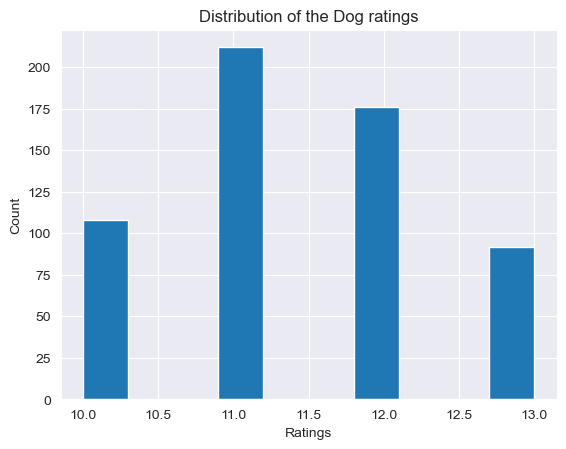

In [577]:
sns.set_style('darkgrid')

twitter_archive_master['rating_numerator'].hist();
plt.title('Distribution of the Dog ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

Of course as expected, the distribution is skewed to the left. Because "they are good dogs Brent", we expect them all to score very highly in the ratings.

# Plot Bar Chart to Show Counts of the Top 7 Dog Breeds

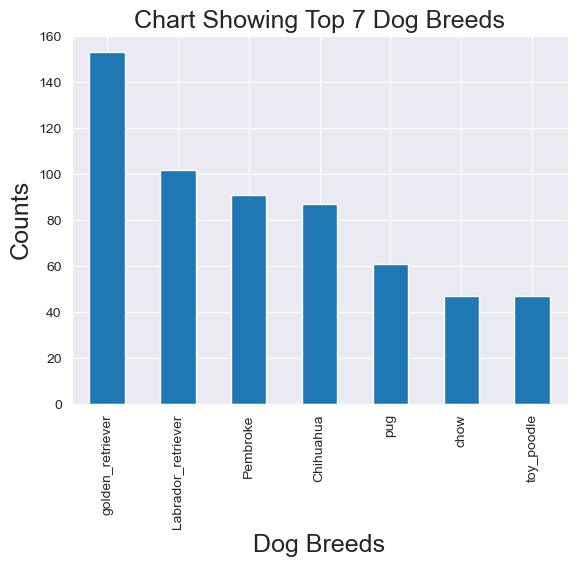

In [578]:
twitter_archive_master.dog_breed.value_counts().plot(kind='bar');
plt.title('Chart Showing Top 7 Dog Breeds', fontsize=18, pad=5)
plt.xlabel('Dog Breeds', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.show()

It's obvious that the retriever family of dog breeds happen to be the top dogs in the billboard, with the Golden Retriever and Labrador retriever appearing 278 times, accounting for over 16% (278/1709) of the entire 113 dog breeds and about 45% (278/623) of the top 7 dog breeds that made it to the ratings board.

## Plot Pie Chart to Show Counts of the Top 7 Dog Breeds

We plot the same data as above, however, using a Pie Chart. This allows us to visualize the result from another perspective

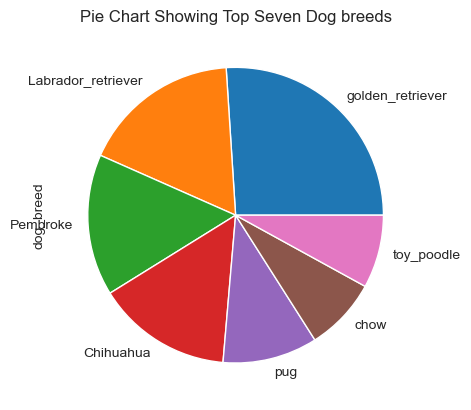

In [579]:
twitter_archive_master.dog_breed.value_counts().plot(kind='pie');
plt.title('Pie Chart Showing Top Seven Dog breeds');

# Analysis

## Mean Likes for all Dog Breeds

In [580]:
#Let's plot the mean favorite count on a chart
twitter_archive_master.groupby('dog_breed')['favorite_count'].mean()

dog_breed
Chihuahua              7213.839080
Labrador_retriever     9917.647059
Pembroke               9594.131868
chow                   8040.595745
golden_retriever      10670.111111
pug                    5138.918033
toy_poodle             5528.808511
Name: favorite_count, dtype: float64

## Visualizing Analyzing the Mean Likes for all Dog Breeds

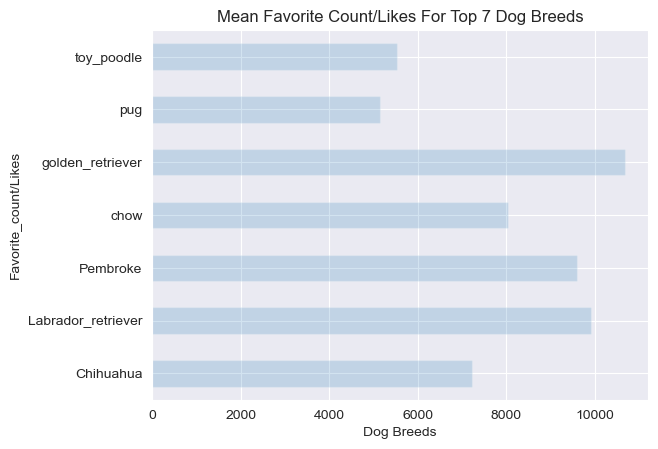

In [581]:
#Let's plot the mean favorite count on a chart
mean_favorite_count = twitter_archive_master.groupby('dog_breed')['favorite_count'].mean()
mean_favorite_count.plot(kind='barh', title='Mean Favorite Count/Likes For Top 7 Dog Breeds', alpha=.2)
plt.xlabel('Dog Breeds')
plt.ylabel('Favorite_count/Likes')
plt.show();

Tweets containing images of the Golden retriever and the Labrador Retriever tends to have the highest likes

It is obvious as we saw above that tweets containing the Retriever family of dogs have the highest likes and retweets.

The bars seem to be telling the same stories. The Golden Retriever and Labrador Retriever have the highest likes and retweets. They seem to be the people's favorite in the United States.

Let's see if this is actually true.

Well, it is true. A visit to [this website](https://worlddogfinder.com/blog/dog-breeds/most-popular-dog-breeds) confirms that trend.

It turns out that the list above was complied in 2022. Maybe we should check out a website that has listing earlier than 2022, say 2021.

Well, the story is the same. [check this out also](https://www.mentalfloss.com/article/643867/most-popular-dog-breeds-america)

We can safely infer that the the Retriever family of dog breeds are most loved in the United States.

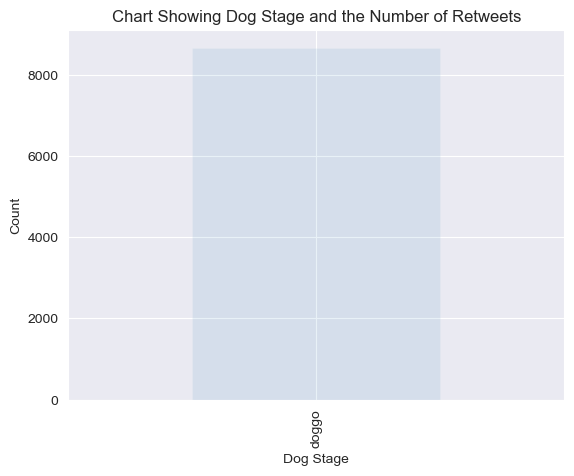

In [582]:
twitter_archive_master.groupby('dog_stage')['favorite_count'].mean().plot(kind='bar', title='Chart Showing Dog Stage and the Number of Retweets', alpha=0.1);
plt.xlabel('Dog Stage')
plt.ylabel('Count')
plt.show()

Well, there seems to be only doggos in out top 7 dog breeds and the entire dataset of over 1700 dog breeds. This is to be taken with a pinch of salt. It is realy unlikely. We may need to investigate this further.

In [ ]:
twitter_archive_master.dog_stage.value_counts()

## Analyzing the Rating Score for Dog Breeds

In [ ]:
twitter_archive_master.groupby(['dog_breed'])['rating_numerator'].mean()

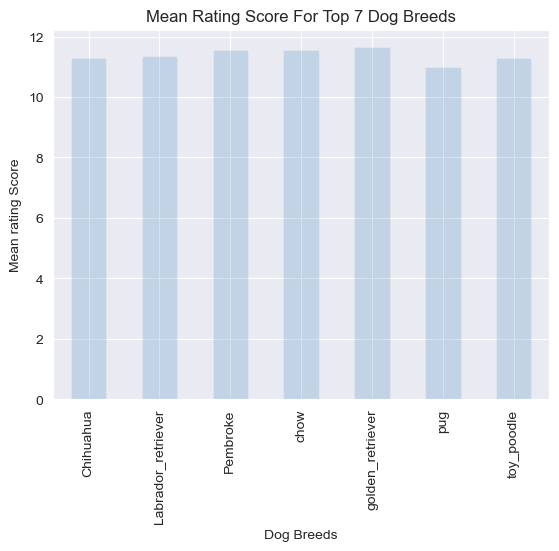

In [583]:
mean_score_rating = twitter_archive_master.groupby(['dog_breed'])['rating_numerator'].mean()
mean_score_rating.plot(kind='bar', title='Mean Rating Score For Top 7 Dog Breeds', alpha=.2)
plt.xlabel('Dog Breeds')
plt.ylabel('Mean rating Score')
plt.show();

Alas, the story is the same - The Retrievers scored the highest marks in the ratings

### THANK YOU